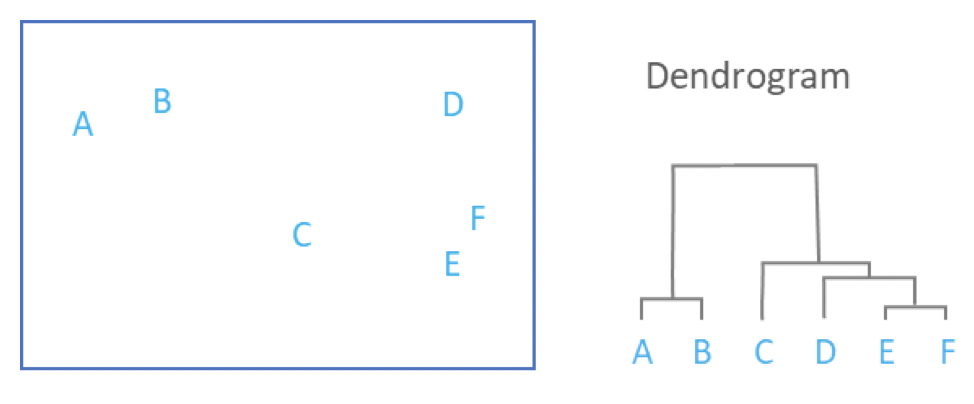

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=sns.load_dataset('iris')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
x=data.iloc[:,[2,3]]
x

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


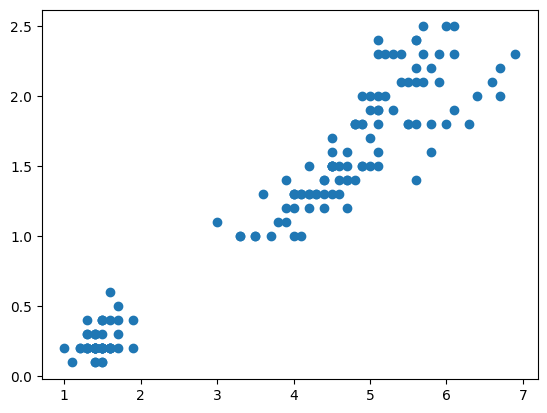

In [5]:
plt.scatter(x['petal_length'],x['petal_width'])
plt.show()

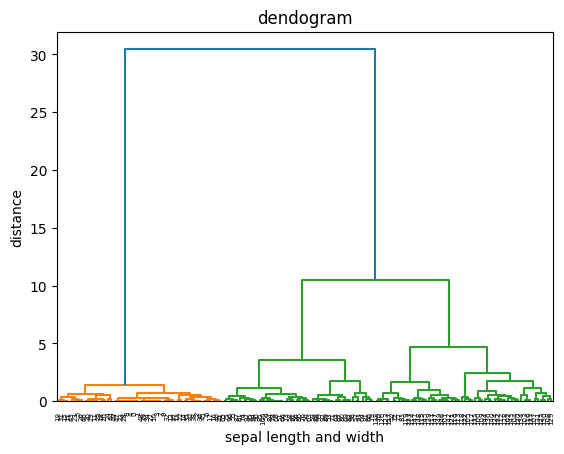

In [6]:
import scipy.cluster.hierarchy as sch

dg=sch.dendrogram(sch.linkage(x,method='ward'))#linkage function specifying the distance between two clusters(ward is a method of linkage)
plt.title('dendogram')
plt.xlabel('sepal length and width')
plt.ylabel('distance')
plt.show()

In [7]:
from sklearn.cluster import AgglomerativeClustering
Ag=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
#affinity metric : How the distance between points calculated (euclidean is the default distance metric)
#linkage method : between which points the distance is calculated
#these are the main two things that influence the creation of final clusters and the outcome of the algorithm

pred_cluster=Ag.fit_predict(x)
pred_cluster

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

In [ ]:
data['cluster']=pred_cluster
data

In [ ]:
data.iloc[120:149,[4,5]]

In [ ]:
df1 = data[data.cluster==0]
df2 = data[data.cluster==1]
df3 = data[data.cluster==2]
plt.scatter(df1['petal_length'],df1['petal_width'],color='green',label='Cluster1')
plt.scatter(df2['petal_length'],df2['petal_width'],color='blue',label='Cluster2')
plt.scatter(df3['petal_length'],df3['petal_width'],color='red',label='Cluster3')



plt.xlabel('petal_length (cm)')
plt.ylabel('petal_width (cm)')

plt.legend()

plt.show()

from this we cant classify the cluster so taking another columns

In [ ]:
x1=data.iloc[:,[2,3]]
x1

In [ ]:
import scipy.cluster.hierarchy as sch

dg=sch.dendrogram(sch.linkage(x,method='ward'))#linkage function specifying the distance between two clusters(ward is a method of linkage)
plt.title('dendogram')
plt.xlabel('petal length and width')
plt.ylabel('distance')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
Ag=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
#affinity metric : How the distance between points calculated (euclidean is the default distance metric)
#linkage method : between which points the distance is calculated
#these are the main two things that influence the creation of final clusters and the outcome of the algorithm

pred_cluster=Ag.fit_predict(x1)
pred_cluster

In [ ]:
data['cluster']=pred_cluster
data.to_string()

In [ ]:
df1 = data[data.cluster==0]
df2 = data[data.cluster==1]
df3 = data[data.cluster==2]
plt.scatter(df1['petal_length'],df1['petal_width'],color='green',label='Cluster1')
plt.scatter(df2['petal_length'],df2['petal_width'],color='blue',label='Cluster2')
plt.scatter(df3['petal_length'],df3['petal_width'],color='red',label='Cluster3')



plt.xlabel('sepal_length (cm)')
plt.ylabel('sepal_width (cm)')

plt.legend()

plt.show()

# DBSCAN

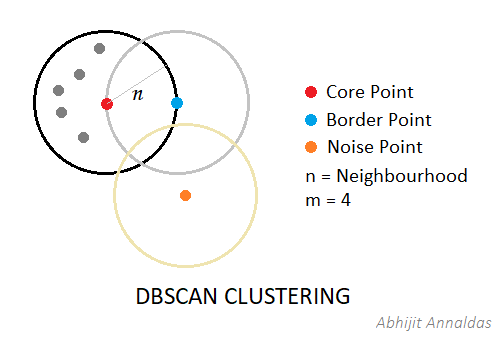

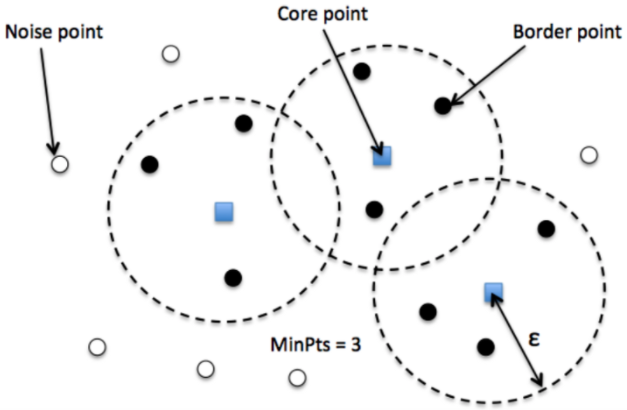

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
data=pd.read_csv("Mall_Customers.csv")
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
sns.heatmap(data.corr())

ValueError: could not convert string to float: 'Male'

In [ ]:
plt.figure(figsize=(6,6))
size=data['Genre'].value_counts()
label=['Female','Male']
color=['pink','purple']
explode=[0,0.3]

plt.pie(size,explode=explode,labels=label,colors=color,shadow=True)
plt.show()


In [ ]:
x=data.iloc[:,[3,4]]
x

In [ ]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=6,min_samples=7,metric='euclidean')

model=db.fit(x)#fitting the model

labels=model.labels_ #how many clusters/groups we are getting
labels

means=db.fit_predict(x)
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=means,cmap='gist_ncar')

n_clusters = len(set(labels))-(1 if -1 in labels else 0)#number of clusters in labels , ignoring noise if presnt

n_noise = list(labels).count(-1)
print('number of clusters: ',n_clusters)
print('number of noises: ',n_noise)

data['cluster']=labels
data.tail(30)

plt.figure(figsize=(7,5))

df1 = data[data.cluster==-1]
df2 = data[data.cluster==0]
df3 = data[data.cluster==1]
df4 = data[data.cluster==2]





plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='green',label='Cluster-1')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='blue',label='Cluster0')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='purple',label='Cluster1')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='red',label='Cluster2')


plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('DBSCAN clustering')
plt.show()

In [ ]:
df.head()